In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown

Carregar dataset "Penguins" do seaborn

In [93]:
penguins = sns.load_dataset('penguins')

1. Dados faltantes: para a prática, será adicionado ao dataset

In [3]:
missing_rate = 0.4
columns = ['island', 'body_mass_g']
for column in columns:
    missed_rows = np.random.choice(
        range(penguins.shape[0]),
        size = int(penguins.shape[0] * missing_rate),
        replace=False)
    penguins.loc[missed_rows, column] = np.NaN

In [94]:
display(Markdown("## Pinguins"))
penguins.head(10)

## Pinguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


#### *Tratamento de variável categórica*

1.1 Uso de One Hot Encoder

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
nominal_encoder = OneHotEncoder()
nominal_encoder.fit(penguins[['species']])
nominal_encoder.transform(penguins[['species']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

1.2 Uso de Ordinal Encoder

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(tips[['day']])[:30]

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

#### *Tratamento de dados faltantes*

In [11]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

    1. Deleção

In [12]:
display(Markdown('Quantidade e variáveis faltantes '))
display(penguins.isnull().sum())
shape = penguins.shape
print(f"Formato da tabela: {shape}")

Quantidade e variáveis faltantes 

species                0
island               137
bill_length_mm         2
bill_depth_mm          2
flipper_length_mm      2
body_mass_g          138
sex                   11
dtype: int64

Formato da tabela: (344, 7)


    1.1. Deleção de linhas

In [13]:
drop = penguins.dropna().shape
print(f"Formato da tabela: {drop}")

Formato da tabela: (119, 7)


    1.2. Deleção de colunas

In [14]:
penguins.dropna(axis=1)

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


2. Imputação

    2.1. Estatística de tendência central

    2.1.1 Média

In [15]:
mean_imputer = SimpleImputer(strategy='mean')
mean_imputer.fit(penguins[['body_mass_g']])
mean_imputer.transform(penguins[['body_mass_g']])[:15]

array([[3750.        ],
       [3800.        ],
       [3250.        ],
       [4224.87864078],
       [3450.        ],
       [3650.        ],
       [3625.        ],
       [4224.87864078],
       [4224.87864078],
       [4250.        ],
       [3300.        ],
       [4224.87864078],
       [4224.87864078],
       [4224.87864078],
       [4224.87864078]])

     2.1.2. Mediana

In [16]:
median_imputer = SimpleImputer(strategy='median')
median_imputer.fit_transform(penguins[['body_mass_g']])[:10]

array([[3750.],
       [3800.],
       [3250.],
       [4000.],
       [3450.],
       [3650.],
       [3625.],
       [4000.],
       [4000.],
       [4250.]])

    2.2. Aprendizado de máquina

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
iterative_imputer = IterativeImputer(estimator=LinearRegression())
iterative_imputer.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

#### *Tratamento de dados discrepantes* 

In [19]:
from numpy.random import RandomState

In [20]:
r = RandomState(seed = 42)

points = 1000
outliers = 100

data = pd.DataFrame(
    np.vstack([
        2+r.randn(outliers, 2)*4,
        r.randn(points, 2)]),
    columns = ['x1', 'x2'])
display(data.head())

,x1,x2
0,3.986857,1.446943
1,4.590754,8.092119
2,1.063387,1.063452
3,8.316851,5.069739
4,0.122102,4.170240


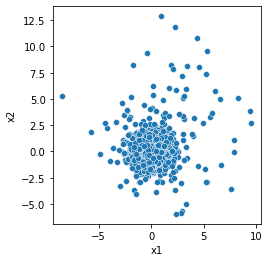

In [21]:
sns.scatterplot(x = 'x1', y = 'x2', data = data)
plt.gca().set_aspect('equal', 'box')
plt.show()

In [22]:
from sklearn.pipeline import TransformerMixin
from scipy.spatial.distance import cdist

In [23]:
class OutlierExtractor(TransformerMixin):
    def __init__(self, threshold = 3, **kwargs):
        self.threshold = threshold
        self.kwargs = kwargs
    
    def transform(self, X, y = None):
        X = np.asarray(X)
        std = np.std(X)
        outliers_zscore = np.abs(cdist(X.mean(axis=0)[np.newaxis], X) / std)[0]
        if y:
            y = np.asarray(y)
            return(
                X[outliers_zscore >= self.threshold, :],
                y[outliers_zscore >= self.threshold, :]
            )
        return X[outliers_zscore >= self.threshold, :]
    def fit(self, *args, **kwargs):
        return self
        

In [24]:
outlier_transform = OutlierExtractor(threshold=3)
outlier_transform.fit(data)
X_new = outlier_transform.transform(data)

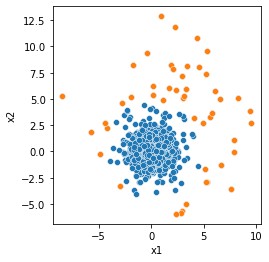

In [25]:
sns.scatterplot(x='x1', y='x2', data=data)
sns.scatterplot(x=X_new[:, 0], y=X_new[: , 1])
plt.gca().set_aspect('equal', 'box')
plt.show()

#### *Seleção de variáveis*

Processo de selecionar as características mais importantes de um dataset, com o objetivo de otimizar a performance do modelo.

In [26]:
from sklearn.feature_selection import (
    VarianceThreshold,
    SelectKBest,
    chi2,
    SelectFromModel 
)
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.datasets import load_digits
digits = load_digits(as_frame=True)
df_digits = digits['frame']
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


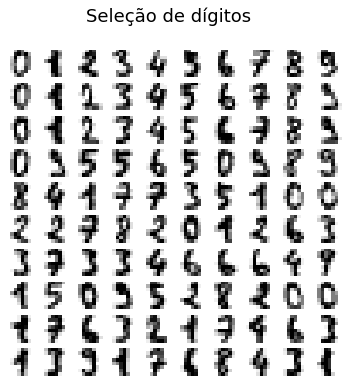

In [28]:
X, y = digits.data, digits.target

samples, features = X.shape
neighbours = 30
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6,6))
for idx, ax in enumerate(axs.ravel()):
    digits.images
    ax.imshow(digits.images[idx], cmap=plt.cm.binary)
    ax.axis('off')
_ = fig.suptitle("Seleção de dígitos", fontsize=18)

2.1. Não supervisionados

2.1.1. Baixa variância

In [29]:
display(Markdown('Conjunto original'))
display(X.shape)

Conjunto original

(1797, 64)

In [41]:
threshold_25 = np.quantile(X.std(), 0.25)
variance_selector = VarianceThreshold(threshold = threshold_25)
print('Conjunto transformado')
variance_selector.fit_transform(X).shape

Conjunto transformado


(1797, 48)

2.2 Supervisionados

2.2.1 Filtragem

In [54]:
display(Markdown('Original'))
display(X.shape)

Original

(1797, 64)

In [53]:
kbest_selector = SelectKBest(score_func=chi2, k=30)
kbest_selector.fit(X, y)
display(Markdown('Transformado'))
display(kbest_selector.transform(X).shape)

Transformado

(1797, 30)

2.2.2 Embrulho

In [56]:
print('Original')
X.shape

Original


(1797, 64)

In [59]:
wrapper_selector = SelectFromModel(estimator=LogisticRegression())
wrapper_selector.fit(X, y)
print('Transformado')
display(wrapper_selector.transform(X).shape)

Transformado


/home/cristina/.cache/pypoetry/virtualenvs/src-nHypXHFi-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(1797, 38)

#### *Normalização*

Padronização da escala para que todos as variáveis possam ser comparadas entre si.

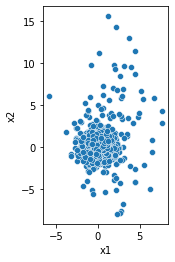

In [87]:
r = RandomState(seed=42)
points = 1000
outliers = 100
df = pd.DataFrame(
    np.vstack([
        2+r.randn(outliers, 2)*[3, 5],
        r.randn(points-outliers, 2)]), 
    columns=['x1', 'x2'])
old_df = df.copy()
df.head()
sns.scatterplot(x = 'x1', y = 'x2', data=df)
plt.gca().set_aspect('equal', 'box')
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

3.1 min-max

In [75]:
min_max = MinMaxScaler()
df_min_max = df.copy()
df_min_max[:] = min_max.fit_transform(df_min_max)

3.2 z-score

In [77]:
zscore_scaler = StandardScaler()
df_zscore = df.copy()
df_zscore[:] = zscore_scaler.fit_transform(df_zscore)

3.3 robusta

In [78]:
robust = RobustScaler()
df_robust = df.copy()
df_robust[:] = robust.fit_transform(df_robust)

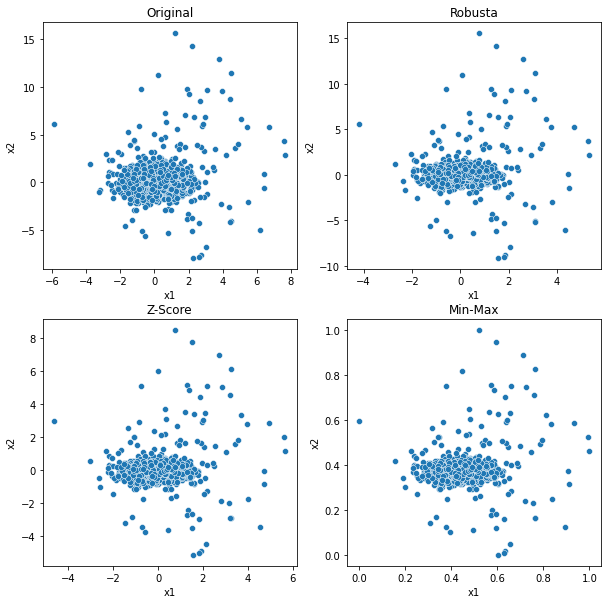

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

def scatter_plot(data, title, ax1, ax2):  
    sns.scatterplot(
        x='x1', y='x2', 
        data=data, 
        ax=axes[ax1,ax2])
    axes[ax1, ax2].set_title(title)
    
scatter_plot(old_df, 'Original', 0, 0)
scatter_plot(df_min_max, 'Min-Max', 1, 1)
scatter_plot(df_zscore, 'Z-Score', 1, 0)
scatter_plot(df_robust, 'Robusta', 0, 1)